## 14. Скоринг на данных Альфа-банка. Решить задачу классификации клиента (1, 0) по платежеспособности. Использовать данные Альфа-банка.

### Загружаем данные и преобразуем из паркета в pandas DataFrame

In [ ]:
import pyarrow.parquet as pq
import pandas as pd
import dask.dataframe as dd

# Список файлов Parquet для загрузки
file_list = ['train_data_0.pq', 'train_data_1.pq' ] # , 'train_data_2.pq' , 'train_data_3.pq', 'train_data_4.pq', 'train_data_5.pq','train_data_6.pq', 'train_data_7.pq',  'train_data_8.pq'  , 'train_data_9.pq', 'train_data_10.pq', 'train_data_11.pq'
file_list_test = ['test_data_0.pq', 'test_data_1.pq']

# Чтение файла Parquet
dataset = pq.ParquetDataset(file_list)
# dataset = dd.read_parquet(file_list).compute() 
dataset_test = pq.ParquetDataset(file_list_test
                                )
# Прочитать все данные из Parquet файлов в виде Table
table = dataset.read()
table_test = dataset_test.read()

# Конвертировать Table в pandas DataFrame
df = table.to_pandas()
df_test = table_test.to_pandas()

df.head()

### Подготовка данных: Очистка данные от пропущенных значений, преобразование категориальных признаков в числовой формат, масштабирование, нормализация, регуляризация и фичаинженирнг признаков.

In [6]:
print(df)
df.head()
df_test.head()

             id  rn  pre_since_opened  pre_since_confirmed  pre_pterm  \
0             0   1                18                    9          2   
1             0   2                18                    9         14   
2             0   3                18                    9          4   
3             0   4                 4                    1          9   
4             0   5                 5                   12         15   
...         ...  ..               ...                  ...        ...   
4082024  499999   8                 6                   11         14   
4082025  499999   9                11                   13         17   
4082026  499999  10                 1                    2         11   
4082027  499999  11                12                   10          1   
4082028  499999  12                12                    2          6   

         pre_fterm  pre_till_pclose  pre_till_fclose  pre_loans_credit_limit  \
0                3               16        

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,3000000,1,11,5,17,14,12,11,3,2,...,3,3,3,4,1,3,4,1,0,0
1,3000000,2,19,16,15,9,12,11,16,3,...,3,3,3,4,1,2,4,1,0,0
2,3000001,1,16,17,8,5,4,9,5,2,...,3,3,3,4,1,3,4,1,0,0
3,3000001,2,16,7,9,0,4,9,1,2,...,3,3,3,4,1,3,4,1,0,0
4,3000001,3,10,0,14,7,11,12,2,2,...,1,1,0,2,1,3,4,1,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Дозагрузим дополнительные данные для создания полноценного датафрейма с Х и У
pd.set_option('display.max_columns', None)
df_score_train = pd.read_csv('train_target.csv')
df_score_test = pd.read_csv('test_target.csv')

In [18]:
# Объединение таблиц по индексу
joined_df_test = df_test.join(df_score_test, on='id', how='inner', lsuffix='_df') # inner - внутреннее объединение
print(joined_df_test)

Empty DataFrame
Columns: [id_df, rn, pre_since_opened, pre_since_confirmed, pre_pterm, pre_fterm, pre_till_pclose, pre_till_fclose, pre_loans_credit_limit, pre_loans_next_pay_summ, pre_loans_outstanding, pre_loans_total_overdue, pre_loans_max_overdue_sum, pre_loans_credit_cost_rate, pre_loans5, pre_loans530, pre_loans3060, pre_loans6090, pre_loans90, is_zero_loans5, is_zero_loans530, is_zero_loans3060, is_zero_loans6090, is_zero_loans90, pre_util, pre_over2limit, pre_maxover2limit, is_zero_util, is_zero_over2limit, is_zero_maxover2limit, enc_paym_0, enc_paym_1, enc_paym_2, enc_paym_3, enc_paym_4, enc_paym_5, enc_paym_6, enc_paym_7, enc_paym_8, enc_paym_9, enc_paym_10, enc_paym_11, enc_paym_12, enc_paym_13, enc_paym_14, enc_paym_15, enc_paym_16, enc_paym_17, enc_paym_18, enc_paym_19, enc_paym_20, enc_paym_21, enc_paym_22, enc_paym_23, enc_paym_24, enc_loans_account_holder_type, enc_loans_credit_status, enc_loans_credit_type, enc_loans_account_cur, pclose_flag, fclose_flag, id]
Index: []

In [19]:
# Объединение таблиц по индексу
joined_df = df.join(df_score_train, on='id', how='inner', lsuffix='_df') # inner - внутреннее объединение
print(joined_df)

          id_df  rn  pre_since_opened  pre_since_confirmed  pre_pterm  \
0             0   1                18                    9          2   
1             0   2                18                    9         14   
2             0   3                18                    9          4   
3             0   4                 4                    1          9   
4             0   5                 5                   12         15   
...         ...  ..               ...                  ...        ...   
1974719  249998   4                 1                    9         14   
1974720  249998   5                 7                    9          4   
1974721  249999   1                 9                    0         10   
1974722  249999   2                 9                   16         10   
1974723  249999   3                 9                    9          6   

         pre_fterm  pre_till_pclose  pre_till_fclose  pre_loans_credit_limit  \
0                3               16        

In [20]:
joined_df.head(100)

,id_df,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,id,flag
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,1,1,0,0
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0,0,0
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,5,3,13,16,9,15,14,16,2,3,0,2,8,6,16,5,4,8,1,0,0,0,0,16,2,17,1,1,1,3,3,3,3,2,1,1,0,1,1,0,1,1,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,11,0
96,11,6,9,16,15,8,1,11,3,2,3,0,2,9,6,16,5,4,8,1,1,1,1,1,12,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,4,1,0,1,11,0
97,12,1,15,1,0,1,2,15,4,2,3,0,2,4,6,16,5,4,8,1,0,1,1,1,9,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,3,3,1,0,0,12,0
98,12,2,14,8,6,1,0,4,4,2,3,0,2,4,6,16,5,4,8,1,0,1,1,1,9,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,4,1,3,3,1,0,0,12,0


In [21]:
df = joined_df

In [22]:
df.shape

(1974724, 63)

In [13]:
df.describe().round(2)

,id_df,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,id,flag
count,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.0,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.0,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00
mean,255187.22,6.68,9.27,8.39,8.30,8.30,7.04,8.36,9.73,2.40,3.01,0.0,2.01,4.63,5.98,15.87,5.00,4.00,8.00,0.9,0.84,0.96,0.98,0.98,13.89,2.18,15.63,0.71,0.94,0.84,0.18,0.38,0.52,0.65,0.79,0.92,1.11,1.25,1.37,1.48,1.63,2.75,1.90,1.99,2.05,2.09,2.14,2.17,2.22,2.25,3.28,2.31,2.34,2.38,3.57,1.03,2.69,3.34,1.00,0.17,0.23,255187.22,0.03
std,144416.12,5.20,5.75,4.69,5.27,4.45,5.18,4.23,5.80,1.37,0.69,0.0,0.32,3.13,0.36,1.18,0.06,0.02,0.08,0.3,0.37,0.20,0.14,0.14,4.37,0.82,4.09,0.45,0.23,0.36,0.65,0.93,1.08,1.19,1.28,1.35,1.42,1.45,1.47,1.48,1.47,1.46,1.43,1.40,1.38,1.36,1.34,1.33,1.30,1.28,1.27,1.25,1.23,1.20,1.05,0.28,0.49,1.07,0.06,0.37,0.42,144416.12,0.17
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,130659.00,3.00,4.00,5.00,4.00,6.00,2.00,5.00,5.00,2.00,3.00,0.0,2.00,2.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,4.00,3.00,3.00,3.00,4.00,1.00,2.00,3.00,1.00,0.00,0.00,130659.00,0.00
50%,258120.00,5.00,9.00,9.00,8.00,8.00,7.00,10.00,10.00,2.00,3.00,0.0,2.00,4.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,1.00,3.00,4.00,1.00,0.00,0.00,258120.00,0.00
75%,380986.00,9.00,14.00,12.00,13.00,11.00,12.00,11.00,15.00,2.00,3.00,0.0,2.00,6.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,1.00,3.00,4.00,1.00,0.00,0.00,380986.00,0.00
max,499999.00,51.00,19.00,17.00,17.00,16.00,16.00,15.00,19.00,6.00,5.00,0.0,3.00,13.00,16.00,19.00,9.00,4.00,19.00,1.0,1.00,1.00,1.00,1.00,19.00,19.00,19.00,1.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,6.00,6.00,5.00,3.00,1.00,1.00,499999.00,1.00


In [23]:
df = df.drop(['pre_loans_total_overdue', 'id', 'id_df'], axis=1)

In [9]:
df.describe().round(2)

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
count,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.0,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00,4082029.00
mean,6.68,9.27,8.39,8.30,8.30,7.04,8.36,9.73,2.40,3.01,2.01,4.63,5.98,15.87,5.00,4.00,8.00,0.9,0.84,0.96,0.98,0.98,13.89,2.18,15.63,0.71,0.94,0.84,0.18,0.38,0.52,0.65,0.79,0.92,1.11,1.25,1.37,1.48,1.63,2.75,1.90,1.99,2.05,2.09,2.14,2.17,2.22,2.25,3.28,2.31,2.34,2.38,3.57,1.03,2.69,3.34,1.00,0.17,0.23,0.03
std,5.20,5.75,4.69,5.27,4.45,5.18,4.23,5.80,1.37,0.69,0.32,3.13,0.36,1.18,0.06,0.02,0.08,0.3,0.37,0.20,0.14,0.14,4.37,0.82,4.09,0.45,0.23,0.36,0.65,0.93,1.08,1.19,1.28,1.35,1.42,1.45,1.47,1.48,1.47,1.46,1.43,1.40,1.38,1.36,1.34,1.33,1.30,1.28,1.27,1.25,1.23,1.20,1.05,0.28,0.49,1.07,0.06,0.37,0.42,0.17
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,4.00,5.00,4.00,6.00,2.00,5.00,5.00,2.00,3.00,2.00,2.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,4.00,3.00,3.00,3.00,4.00,1.00,2.00,3.00,1.00,0.00,0.00,0.00
50%,5.00,9.00,9.00,8.00,8.00,7.00,10.00,10.00,2.00,3.00,2.00,4.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,1.00,3.00,4.00,1.00,0.00,0.00,0.00
75%,9.00,14.00,12.00,13.00,11.00,12.00,11.00,15.00,2.00,3.00,2.00,6.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,1.00,3.00,4.00,1.00,0.00,0.00,0.00
max,51.00,19.00,17.00,17.00,16.00,16.00,15.00,19.00,6.00,5.00,3.00,13.00,16.00,19.00,9.00,4.00,19.00,1.0,1.00,1.00,1.00,1.00,19.00,19.00,19.00,1.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,6.00,6.00,5.00,3.00,1.00,1.00,1.00


In [16]:
df.dtypes

rn                               int64
pre_since_opened                 int64
pre_since_confirmed              int64
pre_pterm                        int64
pre_fterm                        int64
pre_till_pclose                  int64
pre_till_fclose                  int64
pre_loans_credit_limit           int64
pre_loans_next_pay_summ          int64
pre_loans_outstanding            int64
pre_loans_max_overdue_sum        int64
pre_loans_credit_cost_rate       int64
pre_loans5                       int64
pre_loans530                     int64
pre_loans3060                    int64
pre_loans6090                    int64
pre_loans90                      int64
is_zero_loans5                   int64
is_zero_loans530                 int64
is_zero_loans3060                int64
is_zero_loans6090                int64
is_zero_loans90                  int64
pre_util                         int64
pre_over2limit                   int64
pre_maxover2limit                int64
is_zero_util             

In [17]:
df.isnull().sum()

rn                               0
pre_since_opened                 0
pre_since_confirmed              0
pre_pterm                        0
pre_fterm                        0
pre_till_pclose                  0
pre_till_fclose                  0
pre_loans_credit_limit           0
pre_loans_next_pay_summ          0
pre_loans_outstanding            0
pre_loans_max_overdue_sum        0
pre_loans_credit_cost_rate       0
pre_loans5                       0
pre_loans530                     0
pre_loans3060                    0
pre_loans6090                    0
pre_loans90                      0
is_zero_loans5                   0
is_zero_loans530                 0
is_zero_loans3060                0
is_zero_loans6090                0
is_zero_loans90                  0
pre_util                         0
pre_over2limit                   0
pre_maxover2limit                0
is_zero_util                     0
is_zero_over2limit               0
is_zero_maxover2limit            0
enc_paym_0          

### Визуализация (Charts)

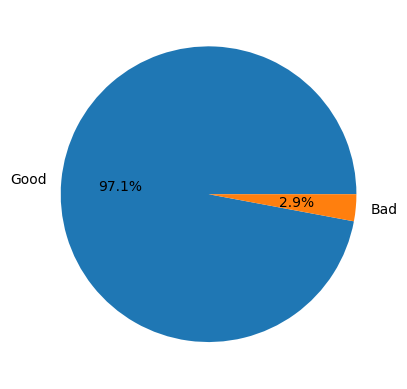

In [18]:
plt.pie(df['flag'].value_counts(), labels=['Good', 'Bad'], autopct='%1.1f%%')
plt.show()

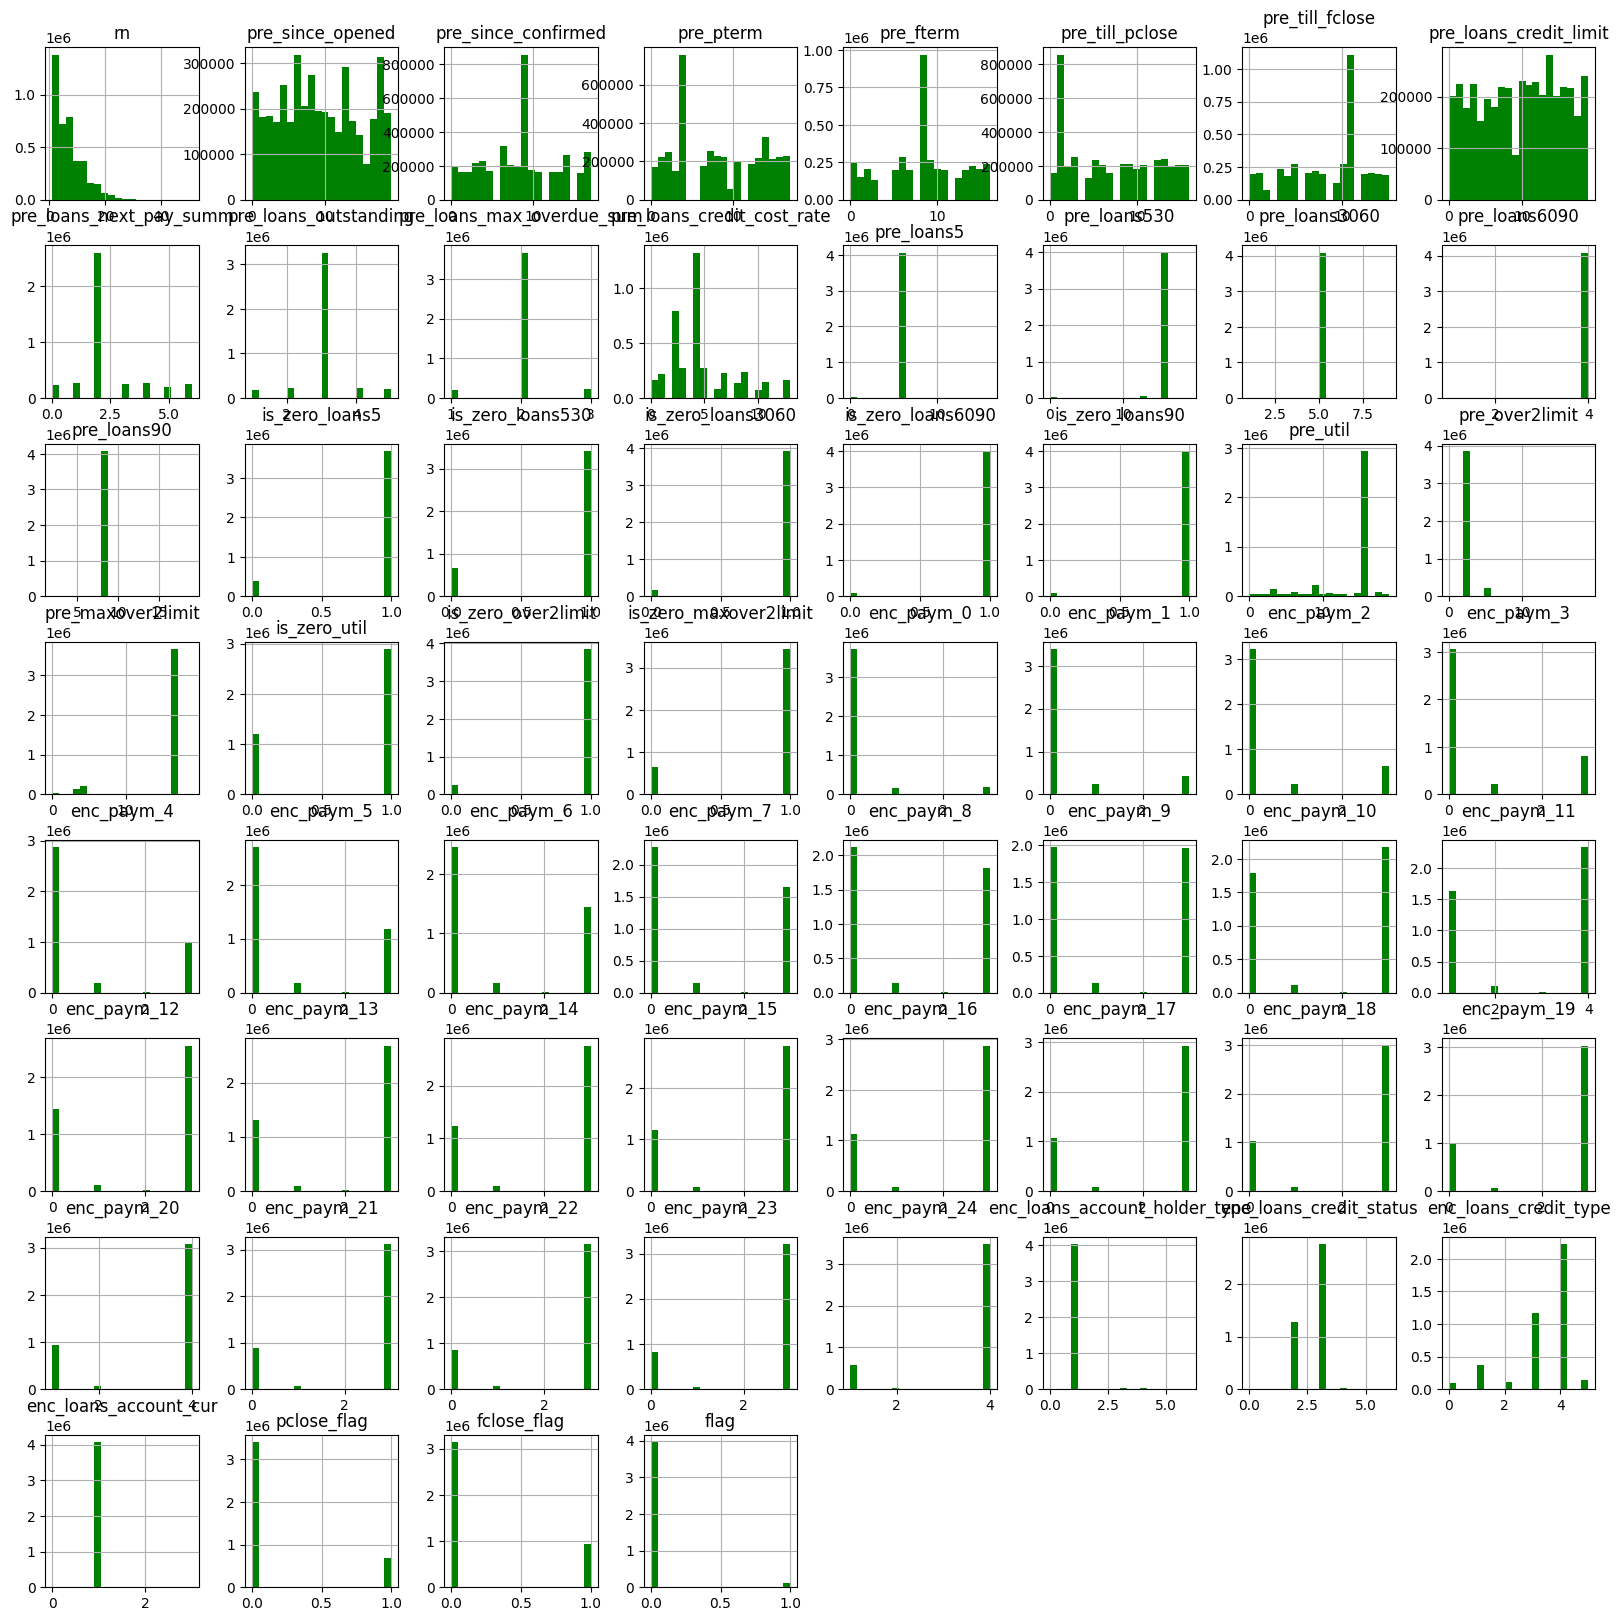

In [19]:
df.hist(bins=20, figsize=(20,20), color='green')
plt.show()

In [20]:
# Выводим список названий колонок в виде списка Python
column_names = list(df.columns)
print(column_names)

['rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm', 'pre_fterm', 'pre_till_pclose', 'pre_till_fclose', 'pre_loans_credit_limit', 'pre_loans_next_pay_summ', 'pre_loans_outstanding', 'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90', 'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24', 'enc_loans_account_holder_type', 'enc_loans_credit_status', 'enc_loans_credit_type', 'enc_lo

In [21]:
!pip install seaborn

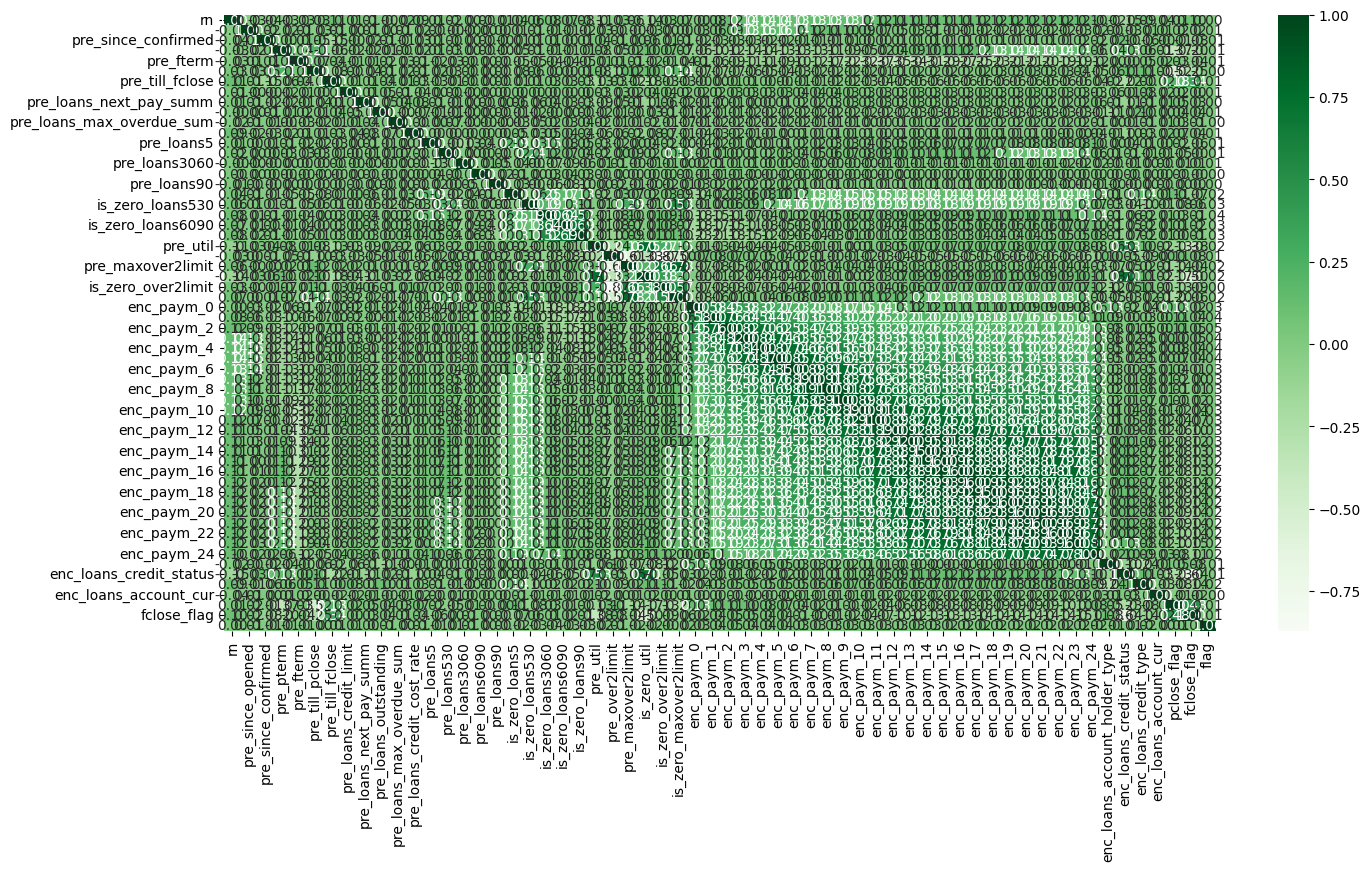

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

### Моделирование

In [24]:
y=df['flag']

In [25]:
X=df.drop(columns=['flag'])

In [25]:
# Decision Tree

In [26]:
import gc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
model = DecisionTreeClassifier()

In [28]:
gc.collect() 

0

In [27]:
X_trainx, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X.shape

(1974724, 59)

In [30]:
X_trainx.shape

(2857420, 59)

In [31]:
X_test.shape

(1224609, 59)

In [32]:
model.fit(X_trainx,  y_train)

DecisionTreeClassifier()

In [33]:
pridictions = model.predict(X_test)
pridictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
model_score=accuracy_score(y_test, pridictions)
model_score

0.9384064627975133

In [35]:
# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

X_trainx, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_trainx,  y_train)

pridictions = model.predict(X_test)
pridictions

model_score=accuracy_score(y_test, pridictions)
model_score

0.9684691195312136

In [37]:
# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model =  KNeighborsClassifier(n_neighbors=6) #Neighbors afgument количество соседей

X_trainx, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_trainx,  y_train)

pridictions = model.predict(X_test)
pridictions

model_score=accuracy_score(y_test, pridictions)
model_score

In [ ]:
# Logistic Regresion

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model =  LogisticRegression(max_iter = 1000) 

X_trainx, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_trainx,  y_train)

pridictions = model.predict(X_test)
pridictions

model_score=accuracy_score(y_test, pridictions)
model_score

0.9708123164209964

### Сохраняем модель

In [15]:
import joblib

joblib.dump(model, 'scoring_test.joblib')

trained_model = joblib.load('scoring_test.joblib')
trained_model.predict(X_trainx)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)